In [ ]:
%pip install semantic-link

In [2]:
import sempy.fabric as fabric

df_datasets = fabric.list_datasets()
df_datasets

StatementMeta(, b59ec0d6-761a-4a43-9e35-73757787c8e2, 9, Finished, Available)

,Dataset Name,Dataset ID,Created Timestamp,Last Update
0,wwi_bronze,0e19bb2e-e965-4d9f-9327-1fd54c81e1fd,2021-02-12 23:00:58,0001-01-01 00:00:00
1,wwi_silver,6d06488b-6c06-4ecd-ba28-a38d8406ebbf,2021-02-12 23:00:58,0001-01-01 00:00:00
2,wwi_gold,f40429e3-e7ef-4d1e-8eb9-af98652fc943,2021-02-12 23:00:58,0001-01-01 00:00:00
3,wwi_business_aggregates_by_city,9801df3d-3acc-4833-a001-259bf3d44755,2021-02-12 23:00:58,0001-01-01 00:00:00
4,nyclake,5ba3ae2c-26b6-4b13-a233-0c44e1d6d3f7,2021-02-12 23:00:58,0001-01-01 00:00:00


In [3]:
dataset = "wwi_gold"
relationships = fabric.list_relationships(dataset)
relationships

StatementMeta(, b59ec0d6-761a-4a43-9e35-73757787c8e2, 10, Finished, Available)

,Multiplicity,From Table,From Column,To Table,To Column
0,m:1,fact_sale,CityKey,dimension_city,CityKey
1,m:1,fact_sale,StockItemKey,dimension_stock_item,StockItemKey
2,m:1,fact_sale,InvoiceDateKey,dimension_date,Date
3,m:1,fact_sale,SalespersonKey,dimension_employee,EmployeeKey
4,m:1,fact_sale,CustomerKey,dimension_customer,CustomerKey


StatementMeta(, b59ec0d6-761a-4a43-9e35-73757787c8e2, 12, Finished, Available)

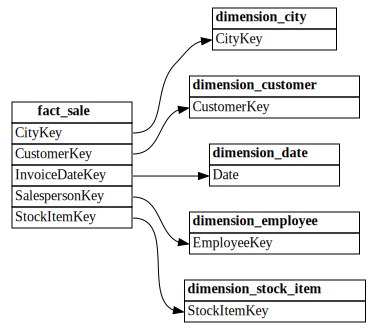

In [5]:
from sempy.relationships import plot_relationship_metadata
plot_relationship_metadata(relationships)

In [14]:
employee = fabric.read_table(dataset, "dimension_employee")
employee

StatementMeta(, b59ec0d6-761a-4a43-9e35-73757787c8e2, 21, Finished, Available)

,Employee,EmployeeKey,IsSalesperson,LineageKey,Photo,PreferredName,ValidFrom,ValidTo,WWIEmployeeID
0,Unknown,0,False,0,None,N/A,2013-01-01 00:00:00,1816-03-30 05:56:08.063277376,0
1,Jack Potter,175,True,3,None,Jack,2016-05-31 23:13:00,2016-05-31 23:14:00.000000000,20
2,Jai Shand,176,False,3,None,Jai,2016-05-31 23:13:00,2016-05-31 23:14:00.000000000,19
3,Katie Darwin,177,False,3,None,Katie,2016-05-31 23:13:00,2016-05-31 23:14:00.000000000,18
4,Piper Koch,178,False,3,None,Piper,2016-05-31 23:13:00,2016-05-31 23:14:00.000000000,17
...,...,...,...,...,...,...,...,...,...
208,Kayla Woodcock,15,True,3,None,Kayla,2013-01-01 00:00:00,2013-03-15 08:00:00.000000000,2
209,Katie Darwin,16,False,3,None,Katie,2013-01-01 00:00:00,2013-08-22 08:00:00.000000000,18
210,Alica Fatnowna,17,False,3,None,Alica,2013-01-01 00:00:00,2013-11-16 08:00:00.000000000,9
211,Eva Muirden,18,False,3,None,Eva,2013-01-01 00:00:00,2016-05-31 23:13:00.000000000,5


In [15]:
dependencies = employee.find_dependencies()
dependencies

StatementMeta(, b59ec0d6-761a-4a43-9e35-73757787c8e2, 22, Finished, Available)

,Determinant,Dependent,Conditional Entropy,Determinant Unique Count,Dependent Unique Count,Determinant Null Count,Dependent Null Count
0,EmployeeKey,ValidTo,0.0,213,143,0,0
1,EmployeeKey,ValidFrom,0.0,213,143,0,0
2,EmployeeKey,"[Employee, WWIEmployeeID]",0.0,213,20,0,0
3,ValidFrom,Photo,0.0,143,1,0,213
4,ValidTo,Photo,0.0,143,1,0,213
5,"[Employee, WWIEmployeeID]",PreferredName,0.0,20,19,0,0
6,PreferredName,LineageKey,0.0,19,2,0,0
7,PreferredName,IsSalesperson,0.0,19,2,0,0
8,IsSalesperson,Photo,0.0,2,1,0,213
9,LineageKey,Photo,0.0,2,1,0,213


StatementMeta(, b59ec0d6-761a-4a43-9e35-73757787c8e2, 20, Finished, Available)

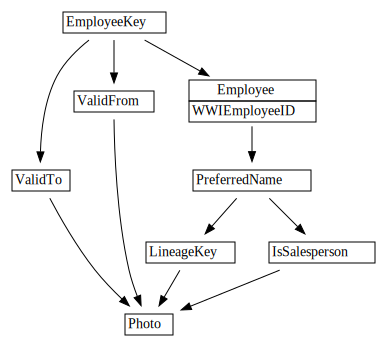

In [13]:
from sempy.dependencies import plot_dependency_metadata
plot_dependency_metadata(dependencies)